[View in Colaboratory](https://colab.research.google.com/github/fidalguez/pythonWork/blob/master/p2_DataScienceFromScratch.ipynb)

Chi
{'id': 3, 'name': 'Chi'}
{'friends': [], 'id': 3, 'name': 'Chi'}
Sue
2.4
[(0, 2), (1, 3), (2, 3), (3, 3), (4, 2), (5, 3), (6, 2), (7, 2), (8, 3), (9, 1)]
[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]
[0, 2, 3, 0, 1, 3]
[0, 0, 5]
Counter({0: 2, 5: 1})
[0, 1]
Counter({9: 3, 1: 2, 8: 1, 5: 1})


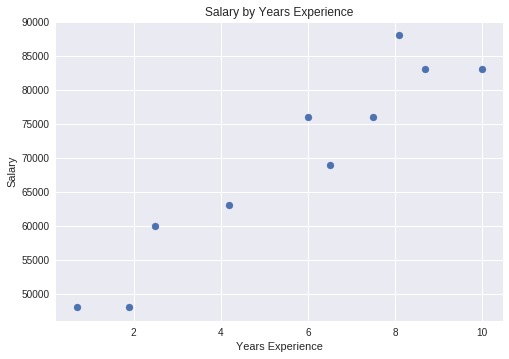

defaultdict(<type 'list'>, {6.5: [69000], 7.5: [76000], 6: [76000], 10: [83000], 8.1: [88000], 4.2: [63000], 0.7: [48000], 8.7: [83000], 1.9: [48000], 2.5: [60000]})
[(6.5, [69000]), (7.5, [76000]), (6, [76000]), (10, [83000]), (8.1, [88000]), (4.2, [63000]), (0.7, [48000]), (8.7, [83000]), (1.9, [48000]), (2.5, [60000])]
{6.5: 69000.0, 7.5: 76000.0, 6: 76000.0, 10: 83000.0, 8.1: 88000.0, 4.2: 63000.0, 8.7: 83000.0, 0.7: 48000.0, 1.9: 48000.0, 2.5: 60000.0}
[(6.5, 69000.0), (7.5, 76000.0), (6, 76000.0), (10, 83000.0), (8.1, 88000.0), (4.2, 63000.0), (8.7, 83000.0), (0.7, 48000.0), (1.9, 48000.0), (2.5, 60000.0)]
defaultdict(<type 'list'>, {'more than five': [83000, 88000, 76000, 69000, 76000, 83000], 'between two and five': [60000, 63000], 'less than two': [48000, 48000]})
[('more than five', [83000, 88000, 76000, 69000, 76000, 83000]), ('between two and five', [60000, 63000]), ('less than two', [48000, 48000])]
[('more than five', [83000, 88000, 76000, 69000, 76000, 83000]), ('between

In [61]:
# 1.- INTRODUCTION

## 1.1.- FINDING KEY CONNECTORS

# This is a list of dictionaries
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]
### Test
users[4]["name"]="Chi"
print (users[4]["name"])
print (users[3])
###

# This is a list of tuples (pairs)
friendships = [
    (0,1), (0,2), (1,2), (1,3), (2,3), (3,4),
    (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)
]

# We add a list of friends to eachs user dict inside the users list
for user in users:
  user["friends"]=[]
### Test
print (users[3])
###
  
# Populate all these lists with the data in friendship
for i, j in friendships:
  users[i]["friends"].append(users[j])
  users[j]["friends"].append(users[i])
### Test
print(users[1]["friends"][0]["friends"][1]["name"])
###

# What's the average number of connections?
# A function
def number_of_friends(user):
  return len(user["friends"])

total_connections = sum(number_of_friends(user) for user in users)

from __future__ import division
num_users = len(users)
avg_connections = total_connections / num_users
### Test
print(avg_connections)
###

# List of pairs: user id and number of friends
num_friends_by_id = [(user["id"],number_of_friends(user)) for user in users]
# Let's sort it by number of friends, largest to smallest
num_friends_by_id_sorted=sorted(num_friends_by_id,key=lambda(user_id,num_friends):num_friends,reverse=True)
### Test
print(num_friends_by_id)
print(num_friends_by_id_sorted)
###

## 1.2.- DATA SCIENTISTS YOU MAY KNOW

# Function to return friends of friends of user
def friends_of_friend_ids_bad(user):
  return [foaf["id"] for friend in user["friends"] for foaf in friend["friends"] ]
### Test
print(friends_of_friend_ids_bad(users[0]))
###

# Count of mutual friends, excluding people already known to the user
from collections import Counter                  # we need this to count
def not_the_same(user,other_user):               # to differentiate between users
  return user["id"] != other_user["id"]
def not_friends(user,other_user):                # to see if they are friends
  return all(not_the_same(friend,other_user) for friend in user["friends"])
def friends_of_friend_ids(user):                 # count user's friends' friends
  # user: for each of my friends, count their friends which aren't me or ar not my friends already
  ### Test
  print([foaf["id"] for friend in user["friends"] for foaf in friend["friends"]
                 if not_the_same(user,foaf) and not_friends(user,foaf)])
  ###
  return Counter(foaf["id"] for friend in user["friends"] for foaf in friend["friends"]
                 if not_the_same(user,foaf) and not_friends(user,foaf))
### Test
print friends_of_friend_ids(users[3])
###
  
## Interests --> list of pairs (tuples): (user["id"],"interest")
interests = [(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"), 
             (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
             (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
             (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
             (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
             (3, "statistics"), (3, "regression"), (3, "probability"),
             (4, "machine learning"), (4, "regression"), (4, "decision trees"),
             (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
             (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
             (6, "probability"), (6, "mathematics"), (6, "theory"),
             (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
             (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
             (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
             (9, "Java"), (9, "MapReduce"), (9, "Big Data")
            ]

# Function that finds users with a certain interest
def data_scientists_who_like(target_interest):
  return [user_id for (user_id, user_interest) in interests if user_interest == target_interest]
### Test
print(data_scientists_who_like("Cassandra"))
###

# Something more efficient would be to build an index from interests to users
# and another index from users to interests
# "Collections" module --> High-performance container datatypes
from collections import defaultdict
# Keys are interests, values are list of user_ids with that interest
user_ids_by_interest = defaultdict(list)
interests_by_user_id = defaultdict(list)
for (user_id,interest) in interests:
  user_ids_by_interest[interest].append(user_id)
  interests_by_user_id[user_id].append(interest)
# Let's find who's got the most interests in commmon with a given user
def most_common_interests_with_user(user):
  return Counter(interested_user_id
                 for interest in interests_by_user_id[user["id"]]
                 for interested_user_id in user_ids_by_interest[interest]
                 if interested_user_id != user["id"]
                )
### Test
print most_common_interests_with_user(users[0])
###

## 1.3.- SALARIES AND EXPERIENCES

salaries_and_tenures = [ (83000, 8.7), (88000, 8.1),
                         (48000, 0.7), (76000, 6),
                         (69000, 6.5), (76000, 7.5),
                         (60000, 2.5), (83000, 10),
                         (48000, 1.9), (63000, 4.2)
                       ]
# Let's plot it
import matplotlib.pyplot as plt
disgregated = zip(*salaries_and_tenures)
# plt.scatter(disgregated[1],disgregated[0])
# print list(reversed(disgregated))
plt.scatter(*reversed(disgregated))
plt.title('Salary by Years Experience')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()

# Let's look at average salary per tenure
# Keys are years, values are lists of the salaries for each tenure
salary_by_tenure = defaultdict(list)
for (salary,tenure) in salaries_and_tenures:
  salary_by_tenure[tenure].append(salary)
### Test
print salary_by_tenure
print salary_by_tenure.items()
###
#A dictionary
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for (tenure,salaries) in salary_by_tenure.items()
}
### Test
print average_salary_by_tenure
print average_salary_by_tenure.items()
###
# Not really useful, as all tenures are different. Let's try with buckets
def tenure_bucket(tenure):
  if tenure < 2:
    return "less than two"
  elif tenure < 5:
    return "between two and five"
  else:
    return "more than five"
salary_by_tenure_bucket=defaultdict(list)
for salary, tenure in salaries_and_tenures:
  salary_by_tenure_bucket[tenure_bucket(tenure)].append(salary)
### Test
print salary_by_tenure_bucket
print salary_by_tenure_bucket.items()
print list(salary_by_tenure_bucket.iteritems())
###
average_salary_by_bucket = {
    tenure_bucket: sum(salaries)/len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.iteritems()
}
### Test
print average_salary_by_bucket
###

## 1.4.- PAID ACCOUNTS

tenures_and_account_payment_status = [
    (0.7,"paid"), (1.9,"unpaid"), (2.5,"paid"), (4.2,"unpaid"), (6,"unpaid"),
    (6.5,"unpaid"), (7.5,"unpaid"), (8.1,"unpaid"), (8.7,"paid"), (10,"paid"), 
]

tenures_by_account_payment_status=defaultdict(list)
for tenure, payment_status in tenures_and_account_payment_status:
  tenures_by_account_payment_status[payment_status].append(tenure)
### Test
print tenures_by_account_payment_status
###
# A simple model
def predict_paid_or_unpaid(years_experience):
  if years_experience < 3:
    return "paid"
  elif years_experience < 8.5:
    return "unpaid"
  else:
    return "paid"
### Test
print predict_paid_or_unpaid(10)
###

## 1.5.- TOPICS OF INTEREST

# Let's count the number of appearances of each word, splitting interests in
# each constituent word
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())
### Test
print words_and_counts
print words_and_counts.most_common()
###
# Let's list those which appear more than once
for word, count in words_and_counts.most_common():
  if count > 1:
    print word, count

In [0]:
# 2.- A CRASH COURSE IN PYTHON

## 2.1.- THE BASICS

### 2.1.1- ...
